In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(4682)

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Importing xgboost and shap
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

ModuleNotFoundError: No module named 'numpy'

# Importing data

In [183]:
data = np.genfromtxt('data/pop/pop_failures.dat',delimiter='',skip_header = 1)

df = pd.read_csv ("data/pop/pop_failures.dat", sep=',', header=0)
columns = [s for s in (df.columns[0].split(' ')) if s]
columns

['Study',
 'Run',
 'vconst_corr',
 'vconst_2',
 'vconst_3',
 'vconst_4',
 'vconst_5',
 'vconst_7',
 'ah_corr',
 'ah_bolus',
 'slm_corr',
 'efficiency_factor',
 'tidal_mix_max',
 'vertical_decay_scale',
 'convect_corr',
 'bckgrnd_vdc1',
 'bckgrnd_vdc_ban',
 'bckgrnd_vdc_eq',
 'bckgrnd_vdc_psim',
 'Prandtl',
 'outcome']

In [184]:
df = pd.DataFrame(data, columns=columns)
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1.0,1.0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0.0
1,1.0,2.0,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1.0
2,1.0,3.0,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1.0
3,1.0,4.0,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1.0
4,1.0,5.0,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1.0


# Splitting data

In [185]:
# split data into train and test sets
seed = 7
test_size = 0.33
X = StandardScaler().fit_transform(df.drop('outcome', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, df.outcome, test_size=test_size, random_state=seed)

# Training Random Forest Model

In [186]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [187]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [188]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.18%


# SHAP

In [189]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)

In [190]:
shap_values = explainer.shap_values(X)

In [191]:
features = df.columns[df.columns!='outcome']
df[features]

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,1.0,1.0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,1.0,2.0,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,1.0,3.0,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,1.0,4.0,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,1.0,5.0,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3.0,176.0,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,0.400102,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706
536,3.0,177.0,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,0.263398,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565
537,3.0,178.0,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,0.870987,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817
538,3.0,179.0,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,0.267685,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535


In [192]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

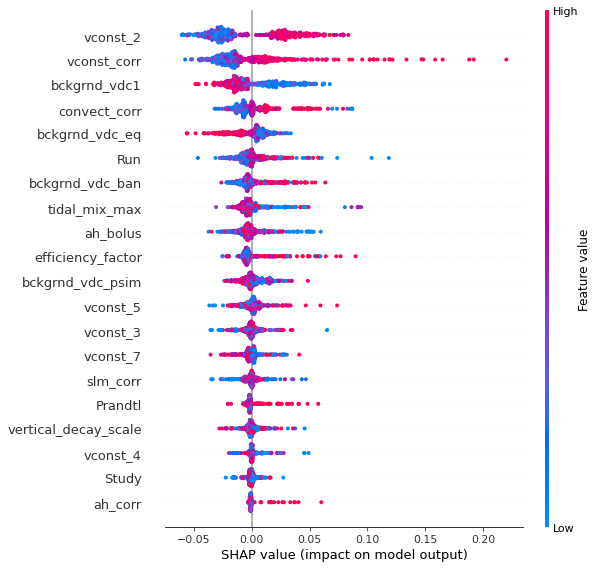

In [193]:
shap.summary_plot(shap_values[0], df[features])

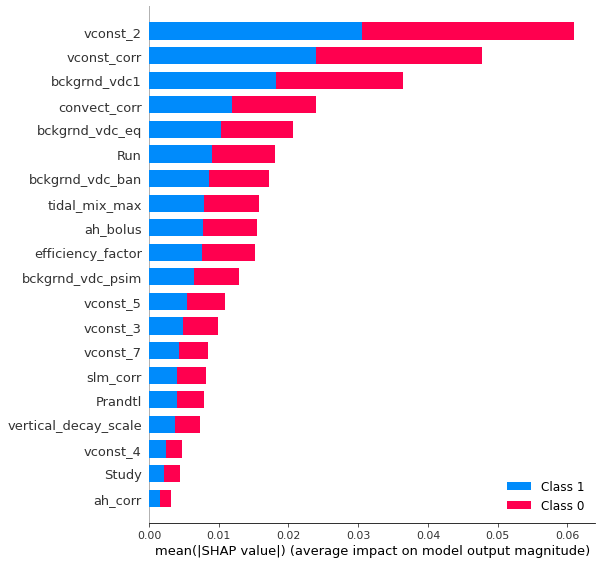

In [194]:
shap.summary_plot(shap_values, df[features], plot_type="bar")

In [195]:
df[features].columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl'],
      dtype='object')

<AxesSubplot:>

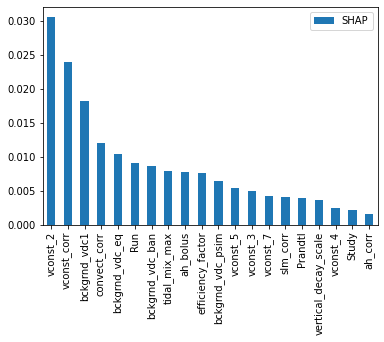

In [196]:
mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
shap_df.plot(kind="bar")

# Random Forest Feature Importance

In [197]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

In [198]:
fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
fi_df = fi_df.T
fi_df.head()

,Importance
vconst_corr,0.183108
vconst_2,0.104055
Run,0.094032
convect_corr,0.074122
bckgrnd_vdc1,0.055101


<AxesSubplot:>

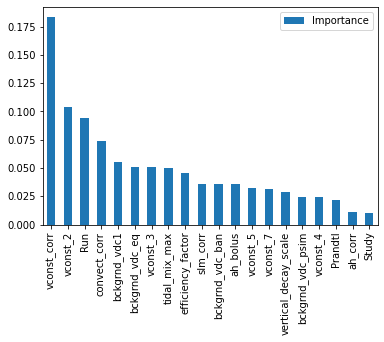

In [199]:
fi_df.plot(kind="bar")

# Seleção por K-Best features

In [200]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [201]:
test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[3.954e-01 2.522e-01 3.959e+01 3.622e+01 1.127e-01 3.243e+00 8.812e-02
 1.414e+00 6.738e-03 1.303e-01 4.532e-01 9.523e-01 8.595e-01 2.130e-01
 1.452e+01 1.967e+01 1.788e+00 5.339e+00 7.891e-01 8.206e-01]


<AxesSubplot:>

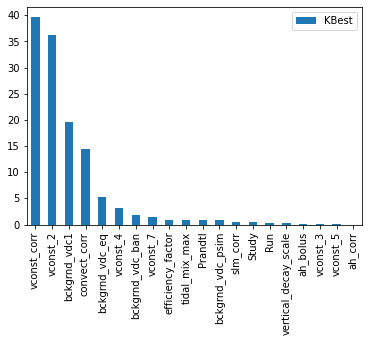

In [202]:
kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
kbest_df.plot(kind="bar")

# Combining Feature Orders

In [203]:
shap_df.index, kbest_df.index, fi_df.index

(Index(['vconst_2', 'vconst_corr', 'bckgrnd_vdc1', 'convect_corr',
        'bckgrnd_vdc_eq', 'Run', 'bckgrnd_vdc_ban', 'tidal_mix_max', 'ah_bolus',
        'efficiency_factor', 'bckgrnd_vdc_psim', 'vconst_5', 'vconst_3',
        'vconst_7', 'slm_corr', 'Prandtl', 'vertical_decay_scale', 'vconst_4',
        'Study', 'ah_corr'],
       dtype='object'),
 Index(['vconst_corr', 'vconst_2', 'bckgrnd_vdc1', 'convect_corr',
        'bckgrnd_vdc_eq', 'vconst_4', 'bckgrnd_vdc_ban', 'vconst_7',
        'efficiency_factor', 'tidal_mix_max', 'Prandtl', 'bckgrnd_vdc_psim',
        'slm_corr', 'Study', 'Run', 'vertical_decay_scale', 'ah_bolus',
        'vconst_3', 'vconst_5', 'ah_corr'],
       dtype='object'),
 Index(['vconst_corr', 'vconst_2', 'Run', 'convect_corr', 'bckgrnd_vdc1',
        'bckgrnd_vdc_eq', 'vconst_3', 'tidal_mix_max', 'efficiency_factor',
        'slm_corr', 'bckgrnd_vdc_ban', 'ah_bolus', 'vconst_5', 'vconst_7',
        'vertical_decay_scale', 'bckgrnd_vdc_psim', 'vconst_4', 'Pran

In [204]:
fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index)), columns=["SHAP", "Importance", "KBest"])
fs_df.head()

,SHAP,Importance,KBest
0,vconst_2,vconst_corr,vconst_corr
1,vconst_corr,vconst_2,vconst_2
2,bckgrnd_vdc1,Run,bckgrnd_vdc1
3,convect_corr,convect_corr,convect_corr
4,bckgrnd_vdc_eq,bckgrnd_vdc1,bckgrnd_vdc_eq


In [205]:
kbest_df

,KBest
vconst_corr,39.585508
vconst_2,36.222307
bckgrnd_vdc1,19.672860
convect_corr,14.524015
bckgrnd_vdc_eq,5.338987
vconst_4,3.243204
bckgrnd_vdc_ban,1.788454
vconst_7,1.414356
efficiency_factor,0.952296
tidal_mix_max,0.859504


# Evaluating feature order: LDA

In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import fbeta_score

In [208]:
fs_df

,SHAP,Importance,KBest
0,vconst_2,vconst_corr,vconst_corr
1,vconst_corr,vconst_2,vconst_2
2,bckgrnd_vdc1,Run,bckgrnd_vdc1
3,convect_corr,convect_corr,convect_corr
4,bckgrnd_vdc_eq,bckgrnd_vdc1,bckgrnd_vdc_eq
5,Run,bckgrnd_vdc_eq,vconst_4
6,bckgrnd_vdc_ban,vconst_3,bckgrnd_vdc_ban
7,tidal_mix_max,tidal_mix_max,vconst_7
8,ah_bolus,efficiency_factor,efficiency_factor
9,efficiency_factor,slm_corr,tidal_mix_max


<AxesSubplot:>

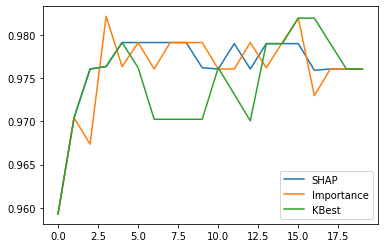

In [207]:
# Transforming X from numpy to pandas to recover features
X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)
# Initializing dataframe for results
LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
# Filling in LDA scores
for num_features in range(fs_df.shape[0]):
    fs_df.iloc[:num_features+1]
    for method in fs_df.columns:
        selected_features = fs_df.iloc[:num_features+1][method]
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
        y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
        LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
LDA_scores.plot()

# Calculating SHAP for LDA

In [237]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train_df.values, y_train)
y_pred = lda.predict(X_test_df)

In [238]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 361 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/179 [00:00<?, ?it/s]

In [239]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

In [240]:
lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
lda_shap_df.head()

,LDA_SHAP
vconst_2,1.367296
vconst_corr,1.307037
bckgrnd_vdc1,0.763086
convect_corr,0.552012
bckgrnd_vdc_eq,0.252085


In [241]:
fs_df['LDA_SHAP'] = lda_shap_df.index

In [243]:
fs_df.head()

,SHAP,Importance,KBest,LDA_SHAP
0,vconst_2,vconst_corr,vconst_corr,vconst_2
1,vconst_corr,vconst_2,vconst_2,vconst_corr
2,bckgrnd_vdc1,Run,bckgrnd_vdc1,bckgrnd_vdc1
3,convect_corr,convect_corr,convect_corr,convect_corr
4,bckgrnd_vdc_eq,bckgrnd_vdc1,bckgrnd_vdc_eq,bckgrnd_vdc_eq


# Repeating Evaluation

<AxesSubplot:>

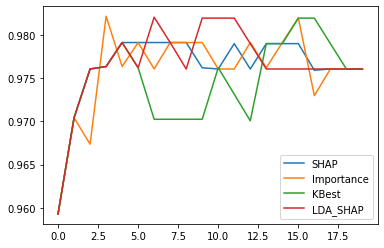

In [242]:
# Transforming X from numpy to pandas to recover features
X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)
# Initializing dataframe for results
LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
# Filling in LDA scores
for num_features in range(fs_df.shape[0]):
    fs_df.iloc[:num_features+1]
    for method in fs_df.columns:
        selected_features = fs_df.iloc[:num_features+1][method]
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
        y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
        LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
LDA_scores.plot()

- Testar para mais bases de dados
    - sonar
    - ILPD (poucas features)
    - ionosfera
    - mfit (fácil)
- Cross validation
- Influência do modelo nos Shapley Values
    - Mesmo modelo, diferentes performances
    - Modelos diferentes

___

Métodos de feature importance (single variable):
- Feature score
- Correlação
- AUC por variavel

Resultado do model com as top X variaveis

LDA para cada variável-> salvar resultados 